<a href="https://colab.research.google.com/github/kdwang1808/2020-MCM/blob/master/problem_c_prepossess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchsummary

In [21]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
··········


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
import sys
os.chdir('drive/Colab Notebooks/2020MCM_PC')

In [0]:
hair = pd.read_csv("hair_dryer.tsv", sep='\t', header=0)
micro = pd.read_csv("microwave.tsv", sep='\t', header=0)
baby = pd.read_csv("pacifier.tsv", sep='\t', header=0)

In [24]:
print(hair.shape, micro.shape, baby.shape)

(11470, 15) (1615, 15) (18939, 15)


In [25]:
hair.head(8)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,5,0,0,N,Y,Works great,Works great!,8/31/2015
1,US,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,Beauty,4,0,0,N,Y,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",8/31/2015
2,US,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,Beauty,5,0,1,N,Y,Five Stars,Love this dryer!,8/31/2015
3,US,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,Beauty,5,0,0,N,Y,Five Stars,styling hair in style,8/31/2015
4,US,107098,R35BHQJHXXJD59,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,Beauty,4,0,0,N,N,I think's great. The cord length is perfect,I just got this last week. I think's great. Th...,8/31/2015
5,US,51995766,R230LCPQDOFJJZ,B000065DJY,919751065,revlon 1875w volumizing hair dryer,Beauty,5,0,0,N,Y,Five Stars,Excellent dryer.,8/31/2015
6,US,39431051,R21NN9ONVZITI0,B000FS1W4U,235105995,"revlon essentials 1875w fast dry hair dryer, r...",Beauty,1,0,0,N,N,Gets extremely hot - I have burned my hand on ...,Gets extremely hot - I have burned my hand on ...,8/31/2015
7,US,180659,RYOOYLVIAHU2A,B003FBG88E,195677102,conair pro styler ionic conditioning hair dryer,Beauty,3,1,1,N,Y,Everything okay but.....!!,I found everything goes well except the plug. ...,8/31/2015


In [26]:
hair.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.147000e+04,1.147000e+04,11470.000000,11470.000000,11470.000000
mean,2.815122e+07,4.846338e+08,4.116042,2.179076,2.563296
std,1.523877e+07,2.873240e+08,1.300333,14.241304,15.382528
min,1.246400e+04,4.239600e+05,1.000000,0.000000,0.000000
25%,1.491441e+07,2.351060e+08,4.000000,0.000000,0.000000
50%,2.707123e+07,4.867740e+08,5.000000,0.000000,0.000000
75%,4.233644e+07,7.322523e+08,5.000000,1.000000,1.000000
max,5.309637e+07,9.994366e+08,5.000000,499.000000,575.000000


In [27]:
hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 15 columns):
marketplace          11470 non-null object
customer_id          11470 non-null int64
review_id            11470 non-null object
product_id           11470 non-null object
product_parent       11470 non-null int64
product_title        11470 non-null object
product_category     11470 non-null object
star_rating          11470 non-null int64
helpful_votes        11470 non-null int64
total_votes          11470 non-null int64
vine                 11470 non-null object
verified_purchase    11470 non-null object
review_headline      11468 non-null object
review_body          11470 non-null object
review_date          11470 non-null object
dtypes: int64(5), object(10)
memory usage: 1.3+ MB


In [28]:
micro.head(8)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,8/31/2015
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,8/31/2015
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",8/31/2015
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",8/31/2015
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,8/31/2015
5,US,16018452,R3M88678ZYC6WI,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Great Microwave,Really love this microwave. Has the one touch ...,8/31/2015
6,US,50761053,R2G20T7N6L3HO1,B001QFYDSI,295520151,sharp microwave drawer oven,Major Appliances,1,0,0,N,N,Stopped working after 2 years,We bought this microwave 2 years ago as part o...,8/30/2015
7,US,21924164,R29F0E6EJJCEEM,B004ZUWBVW,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Was pleased with the packaging and easy instru...,Was pleased with the packaging and easy instru...,8/29/2015


In [29]:
micro.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

In [30]:
print(hair[:].nunique())
print()
print(micro.nunique())
print()
print(baby[:].nunique())

marketplace              1
customer_id          11348
review_id            11470
product_id             538
product_parent         473
product_title          503
product_category         1
star_rating              5
helpful_votes          111
total_votes            119
vine                     2
verified_purchase        2
review_headline       7696
review_body          11197
review_date           2307
dtype: int64

marketplace             2
customer_id          1612
review_id            1615
product_id             80
product_parent         55
product_title          58
product_category        2
star_rating             5
helpful_votes          67
total_votes            75
vine                    3
verified_purchase       4
review_headline      1346
review_body          1601
review_date           906
dtype: int64

marketplace              2
customer_id          17661
review_id            18939
product_id            6482
product_parent        5432
product_title         5533
product_categor

In [31]:
baby["marketplace"].unique()

array(['US', 'us'], dtype=object)

In [0]:
hair = hair.drop(["marketplace", "product_category"], axis=1)
micro = micro.drop(["marketplace", "product_category"], axis=1)
baby = baby.drop(["marketplace", "product_category"], axis=1)

In [33]:
baby["review_date"].nunique()

1908

In [34]:
hair.isnull().sum()

customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          0
review_date          0
dtype: int64

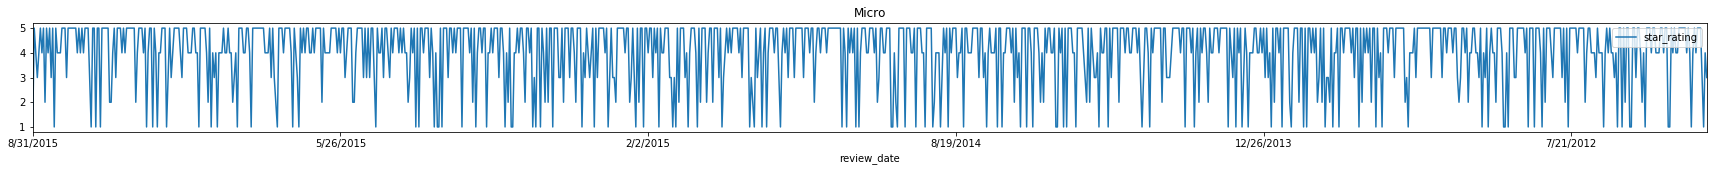

In [35]:
micro.loc[micro['verified_purchase']=='Y', ['review_date', 'star_rating']].plot(x='review_date', y='star_rating', title='Micro', figsize=(30, 2))

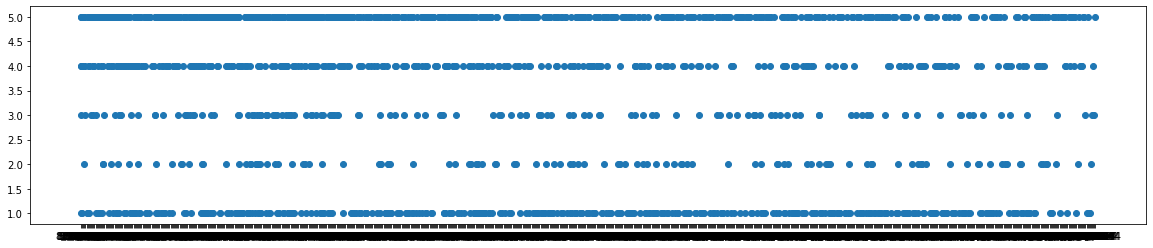

In [37]:
plt.figure(figsize=(20, 4))
plt.scatter(micro['review_date'], micro['star_rating'])

In [39]:
baby.head(8)

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,8/31/2015
1,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,5,0,0,N,Y,Love 💕,My little girl love this paci contraption!,8/31/2015
2,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,8/31/2015
3,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,5,0,0,N,Y,Five Stars,Perfect,8/31/2015
4,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,8/31/2015
5,36369192,R2EUVAGKYPV8Z3,B00PF841HA,449026476,"philips avent freeflow pacifier bpa, free blue...",5,0,0,N,Y,Five Stars,"Great, breathable, and basic pacifier.",8/31/2015
6,18742061,R2EC65V4U7R8FZ,B0082I1IA8,218693378,mam glow in the dark night orthodontic pacifie...,5,0,0,N,Y,Five Stars,Great pacifiers,8/31/2015
7,15312194,RG9XY3EKPUCL1,B00067AUNY,957640647,"dexbaby womb sounds bear audio pacifier, brown...",3,0,0,N,Y,Does the job,The bear does exactly what we ordered it to do...,8/31/2015


In [40]:
baby["verified_purchase"].value_counts()

Y    9791
y    6470
N    1407
n    1271
Name: verified_purchase, dtype: int64

In [0]:
hair["verified_purchase"] = hair["verified_purchase"].str.upper()
micro["verified_purchase"] = micro["verified_purchase"].str.upper()
baby["verified_purchase"] = baby["verified_purchase"].str.upper()

In [0]:
baby = baby[baby["verified_purchase"]=='Y']
micro = micro[micro["verified_purchase"]=='Y']
hair = hair[hair["verified_purchase"]=='Y']

In [0]:
for data in [baby, micro, hair]:
  data['yy'] = data['review_date'].apply(lambda x:x.split('/')[2])
  data['dd'] = data['review_date'].apply(lambda x:x.split('/')[1])
  data['mm'] = data['review_date'].apply(lambda x:x.split('/')[0])
  data['yy'] = data['yy'].astype(int)
  data['dd'] = data['dd'].astype(int)
  data['mm'] = data['mm'].astype(int)

In [0]:
baby = baby.drop(["verified_purchase"], axis=1)
micro = micro.drop(["verified_purchase"], axis=1)
hair = hair.drop(["verified_purchase"], axis=1)

In [63]:
baby.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,review_headline,review_body,yy,dd,mm
0,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",5,0,0,N,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015,31,8
1,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,5,0,0,N,Love 💕,My little girl love this paci contraption!,2015,31,8
2,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,5,0,0,N,Five Stars,My son loves this one and will only sleep if h...,2015,31,8
3,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,5,0,0,N,Five Stars,Perfect,2015,31,8
4,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,5,0,0,N,Five Stars,Amazing addition to the nursery!,2015,31,8


In [0]:
baby = baby.drop(["vine"], axis=1)
micro = micro.drop(["vine"], axis=1)
hair = hair.drop(["vine"], axis=1)

In [69]:
baby.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body,yy,dd,mm
0,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",5,0,0,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015,31,8
1,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,5,0,0,Love 💕,My little girl love this paci contraption!,2015,31,8
2,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,5,0,0,Five Stars,My son loves this one and will only sleep if h...,2015,31,8
3,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,5,0,0,Five Stars,Perfect,2015,31,8
4,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,5,0,0,Five Stars,Amazing addition to the nursery!,2015,31,8


In [0]:
hair = hair.drop(["review_date"], axis=1)
micro = micro.drop(["review_date"], axis=1)

In [73]:
hair.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body,yy,dd,mm
0,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,5,0,0,Works great,Works great!,2015,31,8
1,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,4,0,0,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",2015,31,8
2,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,5,0,1,Five Stars,Love this dryer!,2015,31,8
3,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,5,0,0,Five Stars,styling hair in style,2015,31,8
5,51995766,R230LCPQDOFJJZ,B000065DJY,919751065,revlon 1875w volumizing hair dryer,5,0,0,Five Stars,Excellent dryer.,2015,31,8


In [75]:
hair['product_title'].value_counts()

remington ac2015 t|studio salon collection pearl ceramic hair dryer, deep purple    515
andis 1875-watt fold-n-go ionic hair dryer , silver/black (80020)                   510
conair 1875 watt tourmaline ceramic hair dryer                                      506
revlon essentials 1875w fast dry hair dryer, rv408                                  377
conair corp pers care 146np conair ionic conditioning 1875-watt hair dryer          360
                                                                                   ... 
t3 evolution hair dryer professional ceramic bespoke labs, 83888                      1
Mac Hello Kitty Eyeliner Liquid Expert Waterproof                                     1
Hairbrush - Acrylic 1/2 Round                                                         1
5 Pairs Set of 10 Toe Separators Divider                                              1
Homedics Therapist Select Shiatsu Massaging Cushion SBM-300                           1
Name: product_title, Length: 388

In [0]:
hair.to_csv(r'hair.csv', index = False)
baby.to_csv(r'baby.csv', index = False)
micro.to_csv(r'micro.csv', index = False)

In [78]:
hair.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body,yy,dd,mm
0,34678741,R9T1FE2ZX2X04,B003V264WW,732252283,remington ac2015 t|studio salon collection pea...,5,0,0,Works great,Works great!,2015,31,8
1,11599505,RE36JAD5V53PO,B0009XH6V4,670161917,andis micro turbo hair dryer,4,0,0,I love travel blow dryers because they are eas...,"This dries my hair faster that bigger, more po...",2015,31,8
2,2282190,RIDHM8B7SCCV3,B0007NZPY6,16483457,conair pro hair dryer,5,0,1,Five Stars,Love this dryer!,2015,31,8
3,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,253917972,remington silk ceramic professional hair dryer,5,0,0,Five Stars,styling hair in style,2015,31,8
5,51995766,R230LCPQDOFJJZ,B000065DJY,919751065,revlon 1875w volumizing hair dryer,5,0,0,Five Stars,Excellent dryer.,2015,31,8


In [0]:
hair = hair.sort_values(by=['yy', 'mm', 'dd'], ascending=(True, True, True))
micro = micro.sort_values(by=['yy', 'mm', 'dd'], ascending=(True, True, True))
baby = baby.sort_values(by=['yy', 'mm', 'dd'], ascending=(True, True, True))

In [85]:
hair.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body,yy,dd,mm
11469,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,3,320,332,"Some pluses, some minuses",This is my only experience with an ionic hair ...,2002,2,3
11467,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,5,4,4,The best dryer!!!,"I love this dryer not only is it QUIET, it rea...",2002,13,7
11446,50473837,R12APPEFY714W7,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,2,5,6,a Bit Disappointed,The on/off switch on this dryer needs improvem...,2004,15,8
11442,51785663,R3NZ6I1EKJ9FQL,B0002G214U,685652978,conair soft bonnet hair dryer 1 ea,1,165,168,Very Poor Product,I wish I could have read reviews on this produ...,2005,25,5
11436,38641465,R37KYGDKHQ87NK,B0009XH6TG,47684938,"andis 1875-watt fold-n-go ionic hair dryer , s...",4,263,270,"Great product and the only ceramic, ionic blow...","This is the only ceramic, ionic blow dryer wit...",2005,15,9


In [0]:
order = ['yy','mm','dd','customer_id','review_id','product_id','product_parent','product_title','star_rating','helpful_votes','total_votes','review_headline','review_body']
hair = hair[order]
micro = micro[order]
baby = baby[order]

In [87]:
hair.head()

,yy,mm,dd,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body
11469,2002,3,2,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,3,320,332,"Some pluses, some minuses",This is my only experience with an ionic hair ...
11467,2002,7,13,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,5,4,4,The best dryer!!!,"I love this dryer not only is it QUIET, it rea..."
11446,2004,8,15,50473837,R12APPEFY714W7,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,2,5,6,a Bit Disappointed,The on/off switch on this dryer needs improvem...
11442,2005,5,25,51785663,R3NZ6I1EKJ9FQL,B0002G214U,685652978,conair soft bonnet hair dryer 1 ea,1,165,168,Very Poor Product,I wish I could have read reviews on this produ...
11436,2005,9,15,38641465,R37KYGDKHQ87NK,B0009XH6TG,47684938,"andis 1875-watt fold-n-go ionic hair dryer , s...",4,263,270,"Great product and the only ceramic, ionic blow...","This is the only ceramic, ionic blow dryer wit..."


In [0]:
hair.reset_index(drop=True, inplace=True)
micro.reset_index(drop=True, inplace=True)
baby.reset_index(drop=True, inplace=True)

In [89]:
hair.head()

,yy,mm,dd,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,review_headline,review_body
0,2002,3,2,43740490,R2XM83JYE2KDE2,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,3,320,332,"Some pluses, some minuses",This is my only experience with an ionic hair ...
1,2002,7,13,37733836,R3GO6L5PWBS0IW,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,5,4,4,The best dryer!!!,"I love this dryer not only is it QUIET, it rea..."
2,2004,8,15,50473837,R12APPEFY714W7,B00005O0MZ,694290590,conair corp pers care 146np conair ionic condi...,2,5,6,a Bit Disappointed,The on/off switch on this dryer needs improvem...
3,2005,5,25,51785663,R3NZ6I1EKJ9FQL,B0002G214U,685652978,conair soft bonnet hair dryer 1 ea,1,165,168,Very Poor Product,I wish I could have read reviews on this produ...
4,2005,9,15,38641465,R37KYGDKHQ87NK,B0009XH6TG,47684938,"andis 1875-watt fold-n-go ionic hair dryer , s...",4,263,270,"Great product and the only ceramic, ionic blow...","This is the only ceramic, ionic blow dryer wit..."


In [90]:
hair.shape

(9811, 13)

In [0]:
hair.to_csv(r'hair.csv', index = False)
baby.to_csv(r'baby.csv', index = False)
micro.to_csv(r'micro.csv', index = False)